<a href="https://www.kaggle.com/code/jayabharathiravi/notebook0e0a083d8b?scriptVersionId=107830483" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cost-prediction/insurance.csv


IMPORTING THE NEEDED PACKAGES

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import metrics


## **IMPORTING DATASET**

In [3]:
df=pd.read_csv('../input/health-insurance-cost-prediction/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **DATA PREPROCESSING**

In [4]:
print(df.shape)

(1338, 7)


In [5]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


By using data description, we came to know there is no outliers in the data.

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values in data

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The data types are in right formate. The data needs encoding for sex,smoker and region columns.

In [8]:
df.duplicated().sum()

1

There is only one duplicated row. we can drop that row

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

Now, there is no duplicates.

Moving forward to EDA part.

## **EDA**

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Here, we gonna predict the charge amount using the features columns.

### **FEATURE DISTRIBUTION**

AGE

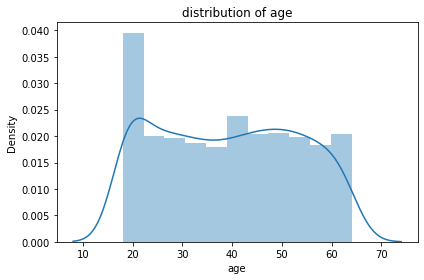

In [12]:
sns.distplot(df.age)
plt.title("distribution of age")
plt.tight_layout()

At the age of 25 to 60 it slightly looks like uniformly distributed.

SEX

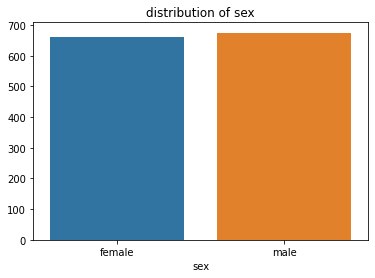

In [13]:
A=df['sex'].groupby(df['sex']).count()
sns.barplot(x=A.index,y=A.values,data=df)
plt.title("distribution of sex")
plt.show()

Sex distributed uniformly. We will go with binary encode.

BMI

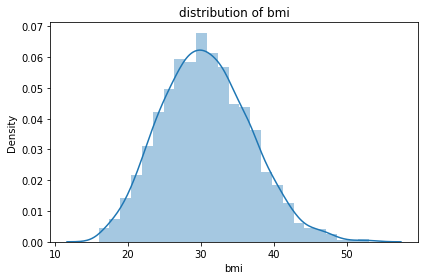

In [14]:
sns.distplot(df.bmi)
plt.title("distribution of bmi")
plt.tight_layout()

The bmi distributed normally

CHILDREN

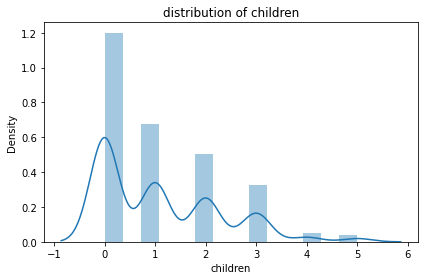

In [15]:
sns.distplot(df.children)
plt.title("distribution of children")
plt.tight_layout()

The children column distributed categorically. The people has no child acquires high in range.

SMOKER

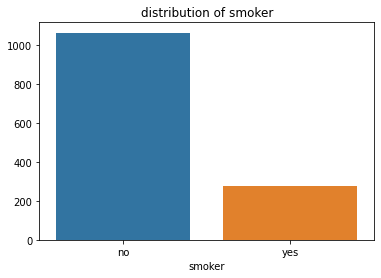

In [16]:
B=df['smoker'].groupby(df['smoker']).count()
sns.barplot(x=B.index,y=B.values,data=df)
plt.title("distribution of smoker")
plt.show()

No smoker distributed more. We will go with binary encode. 1 for no 0 for yes

REGION

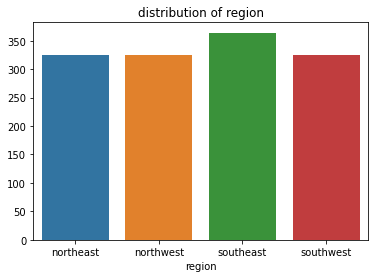

In [17]:
C=df['region'].groupby(df['region']).count()
sns.barplot(x=C.index,y=C.values,data=df)
plt.title("distribution of region")
plt.show()

Except southeast, all other regions are distributes equally. So, we can go with one-hot. 

### **FEATURES VS TARGET**

AGE

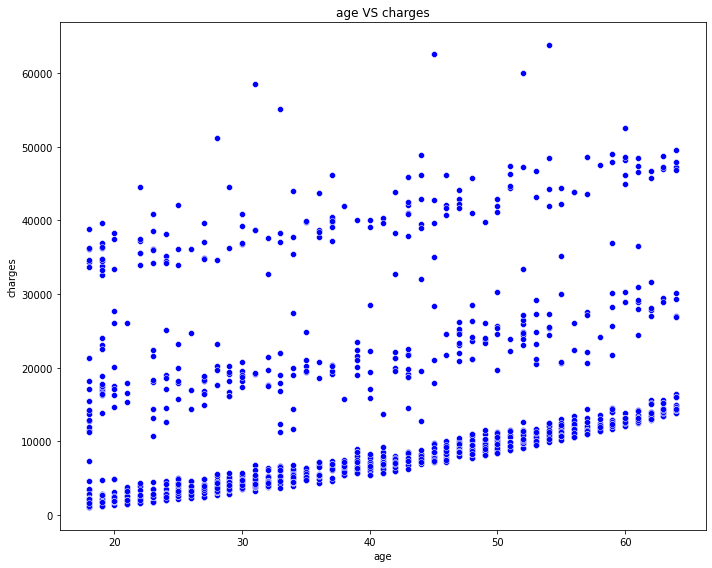

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['age'], y=df['charges'],color='blue');
plt.title('age VS charges')
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

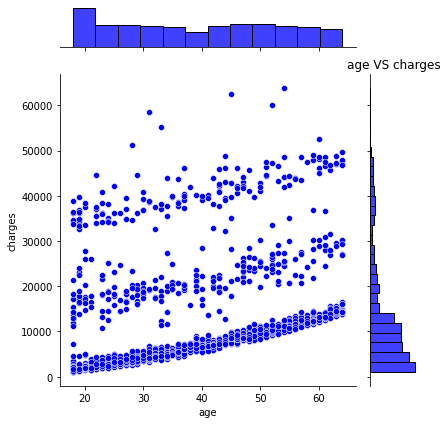

In [19]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df['age'], y=df['charges'],color='blue')
plt.title('age VS charges')
plt.tight_layout()
plt.show()

SEX

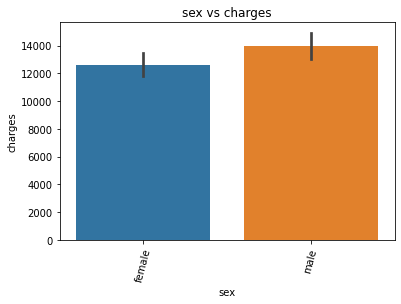

In [20]:
sns.barplot(x='sex',y='charges',data=df,order=df.groupby('sex')['charges'].mean().reset_index().sort_values('charges')['sex'])
plt.xticks(rotation=75)
plt.title('sex vs charges')
plt.show()

By analysing, Men are charges high.

BMI

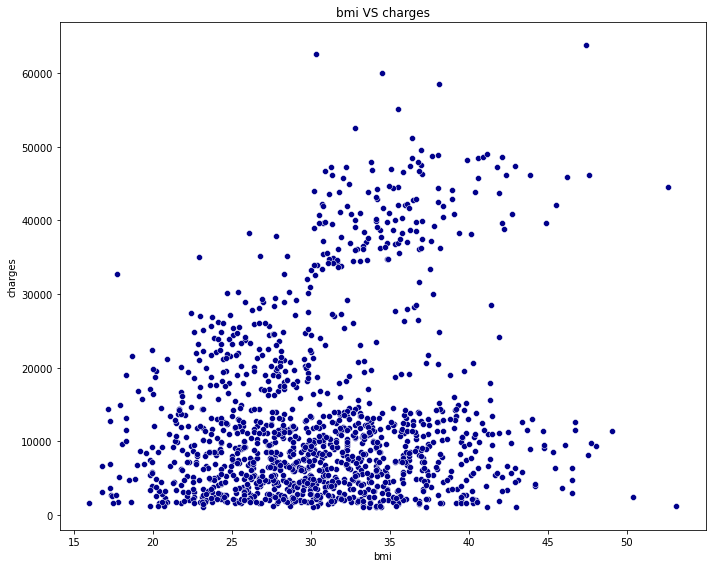

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['bmi'], y=df['charges'],color='darkblue');
plt.title('bmi VS charges')
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

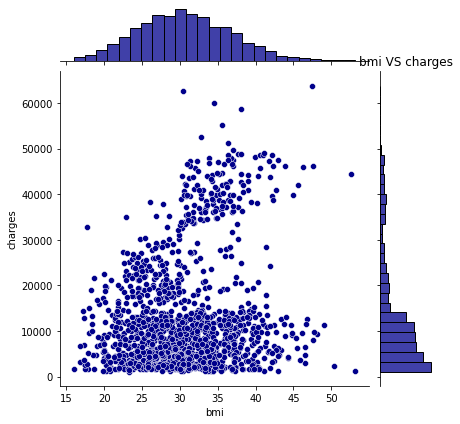

In [22]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df['bmi'], y=df['charges'],color='darkblue')
plt.title('bmi VS charges')
plt.show()

CHILDREN

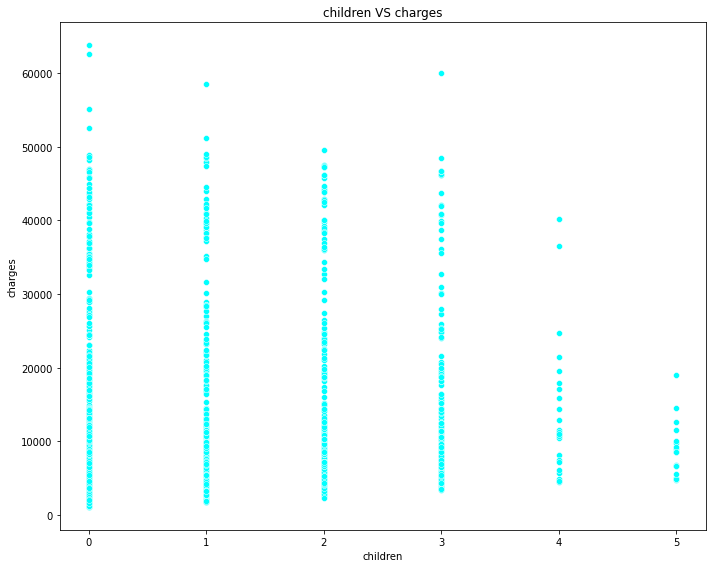

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['children'], y=df['charges'],color='cyan');
plt.title('children VS charges')
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

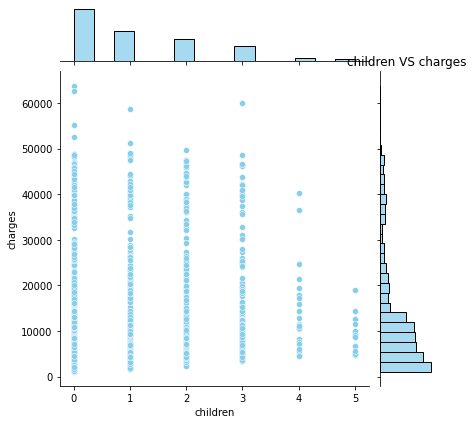

In [24]:
plt.figure(figsize=(10, 8))
sns.jointplot(x=df['children'], y=df['charges'],color='skyblue')
plt.title('children VS charges')
plt.show()

SMOKER

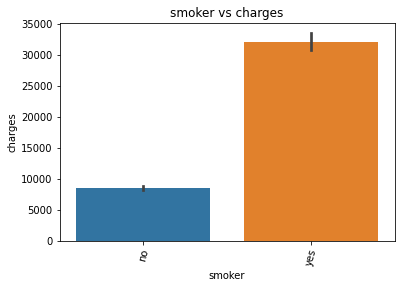

In [25]:
sns.barplot(x='smoker',y='charges',data=df,order=df.groupby('smoker')['charges'].mean().reset_index().sort_values('charges')['smoker'])
plt.xticks(rotation=75)
plt.title('smoker vs charges')
plt.show()

REGION

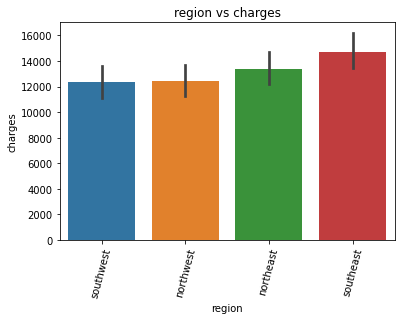

In [26]:
sns.barplot(x='region',y='charges',data=df,order=df.groupby('region')['charges'].mean().reset_index().sort_values('charges')['region'])
plt.xticks(rotation=75)
plt.title('region vs charges')
plt.show()

## **ENCODING**

### **LABEL**

In [27]:
df['sex']=df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'no':0,'yes':1})

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### **ONE-HOT**

In [28]:
df= pd.get_dummies(df, columns=["region"])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## **FEATURE SELECTION**

In [29]:
X=df[['age', 'sex', 'bmi', 'children', 'smoker','region_northeast', 'region_northwest', 'region_southeast','region_southwest']]
Y=df['charges']

## **SPLITTING**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## **FITTING XGBOOST MODEL**

In [31]:
x_train=X_train
y_train=Y_train
x_test=X_test
y_test=Y_test

In [32]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,2]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.5952956881001696  Cross-Val score :  0.5541855638910638
Learning rate :  0.02  Train score :  0.8635701380875124  Cross-Val score :  0.8021036010481291
Learning rate :  0.03  Train score :  0.9155348998714318  Cross-Val score :  0.8343753258572442
Learning rate :  0.04  Train score :  0.9340201905918502  Cross-Val score :  0.8353688822718179
Learning rate :  0.05  Train score :  0.938768957077522  Cross-Val score :  0.8355030976514758
Learning rate :  0.06  Train score :  0.94649466443056  Cross-Val score :  0.8322726514721142
Learning rate :  0.07  Train score :  0.9492318322439025  Cross-Val score :  0.8303165690086546
Learning rate :  0.08  Train score :  0.9567344797750655  Cross-Val score :  0.8266458467744041
Learning rate :  0.09  Train score :  0.9587168599483569  Cross-Val score :  0.8269774067589244
Learning rate :  0.1  Train score :  0.965251363144604  Cross-Val score :  0.8276035662640522
Learning rate :  0.11  Train score :  0.96744

In [33]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate = 0.05, n_estimators=100)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
y_test=Y_test
y_pred = xgb.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
856,40974.16490,41448.101562
778,5934.37980,5523.183594
65,1743.21400,2599.867432
624,12129.61415,13283.754883
1007,24915.22085,26477.576172
...,...,...
173,5246.04700,5648.491211
1197,5699.83750,6326.450195
539,27346.04207,9775.992188
46,3393.35635,6334.560547


## **EVALUATION METRIC**

In [35]:
print(metrics.r2_score(xgb.predict(X_test),y_test))

0.8638450527793209


## **FEATURE IMPORTANCE**

In [36]:
importances = list(xgb.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(['age', 'sex', 'bmi', 'children', 'smoker','region_northeast', 'region_northwest', 'region_southeast','region_southwest'], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: smoker               Importance: 0.949999988079071
Variable: bmi                  Importance: 0.019999999552965164
Variable: age                  Importance: 0.009999999776482582
Variable: region_northwest     Importance: 0.009999999776482582
Variable: sex                  Importance: 0.0
Variable: children             Importance: 0.0
Variable: region_northeast     Importance: 0.0
Variable: region_southeast     Importance: 0.0
Variable: region_southwest     Importance: 0.0
